# King County Housing Data
Predicting Housing Prices Near Seattle

# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
pd.set_option('display.max_columns', None)

%matplotlib inline
df_train = pd.read_csv("kc_house_data.csv")
sns.set_style('darkgrid')
print(df_train.shape)
df_train.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Let's take a list of the features and curate the dataframe to the ones we want

In [2]:
cols = list(df_train.columns.values)

cols

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [3]:
df_train = df_train[cols[2:]]
df_train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# This is the SweetViz module. Will be shown in the PNG folder

In [4]:
# importing sweetviz
import sweetviz as sv
#analyzing the dataset
house_report = sv.analyze(df_train)
#display the report
house_report.show_html('Housing_Report.html')


:FEATURES DONE:                    |█████████████████████| [100%]   00:09  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)


Creating Associations graph... DONE!
Report Housing_Report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


### The readout says there are 5 duplicates, so let's remove them


In [10]:
df_train = df_train.drop_duplicates( keep='last')
df_train.shape

(21608, 19)

### Let's check to see if there are any null values

In [6]:
df_train.isna().sum()


price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no null values. This makes the process easier.

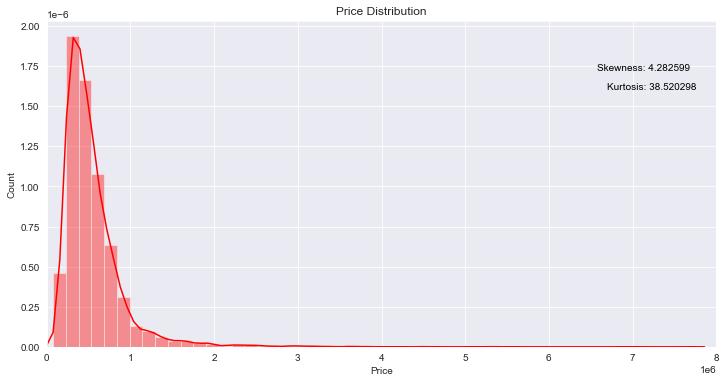

In [5]:
#histogram
fig, ax = plt.subplots(figsize = (12,6))
sns.distplot(df_train['price'], bins=50, color = 'r')
ax.set(xlim=[0, 8000000], xlabel='Price', ylabel='Count',
       title='Price Distribution')
ax.annotate("Skewness: %f" % (df_train['price']).skew(),color = 'k',
            xy=(800,130), xycoords='figure points',
            xytext=(.96, 0.87), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top')
ax.annotate("Kurtosis: %f" % (df_train['price']).kurt(),color = 'k',
            xy=(800,130), xycoords='figure points',
            xytext=(.97, 0.81), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top')
plt.savefig('PNG/price_distribution.png', bbox_inches = 'tight',pad_inches = 0)

In [6]:
print("Skewness: %f" % (df_train['price']).skew())
print("Kurtosis: %f" % (df_train['price']).kurt())

Skewness: 4.282599
Kurtosis: 38.520298


Price is not normally distributed. Going to try a natural log transformation to see if it helps

Text(0.97, 0.81, 'Kurtosis: 0.767354')

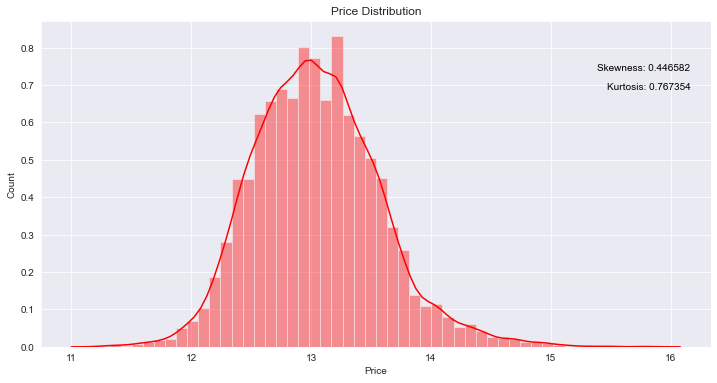

In [7]:
fig, ax = plt.subplots(figsize = (12,6))
sns.distplot(np.log(df_train['price']), bins=50, color = 'r')
ax.set( xlabel='Price', ylabel='Count',
       title='Price Distribution')
ax.annotate("Skewness: %f" % (np.log(df_train['price'])).skew(),color = 'k',
            xy=(800,130), xycoords='figure points',
            xytext=(.97, 0.87), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top')
ax.annotate("Kurtosis: %f" % (np.log(df_train['price'])).kurt(),color = 'k',
            xy=(800,130), xycoords='figure points',
            xytext=(.97, 0.81), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top')
#plt.savefig('PNG/log_price_distribution.png', bbox_inches = 'tight',pad_inches = 0)

In [8]:
print("Skewness: %f" % (np.log(df_train['price'])).skew())
print("Kurtosis: %f" % (np.log(df_train['price'])).kurt())

Skewness: 0.446582
Kurtosis: 0.767354


Much better. 

In [9]:
df_train.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [10]:
df_train[df_train['bedrooms'].eq(33)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8597,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


There are many anomalies, including : bedrooms (max), sqft_living (max), sqft_lot (max), grade (max), sqft_above (max), sqft_basement (max), sqft_living15 (max), sqft_lot15 (max)

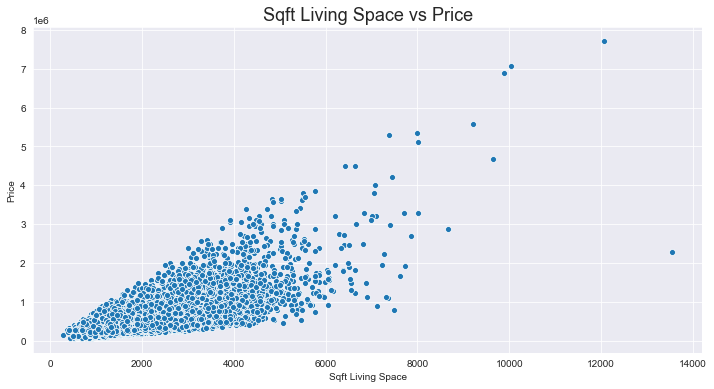

In [11]:
var = 'sqft_living'
fig, axe = plt.subplots(figsize = (12,6))
sns.scatterplot(data = df_train, x = df_train[var], y = df_train['price'])
axe.set_title('Sqft Living Space vs Price', fontdict = {'fontsize' : 18})
axe.set_ylabel('Price')
axe.set_xlabel('Sqft Living Space')
plt.show()

There is a clear relationship between price and living space.

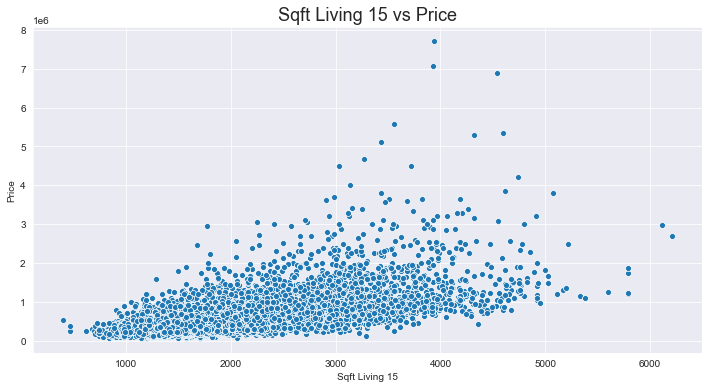

In [12]:
var = 'sqft_living15'
fig, axe = plt.subplots(figsize = (12,6))
sns.scatterplot(data = df_train, x = df_train[var], y = df_train['price'])
axe.set_title('Sqft Living 15 vs Price', fontdict = {'fontsize' : 18})
axe.set_ylabel('Price')
axe.set_xlabel('Sqft Living 15')
plt.show()

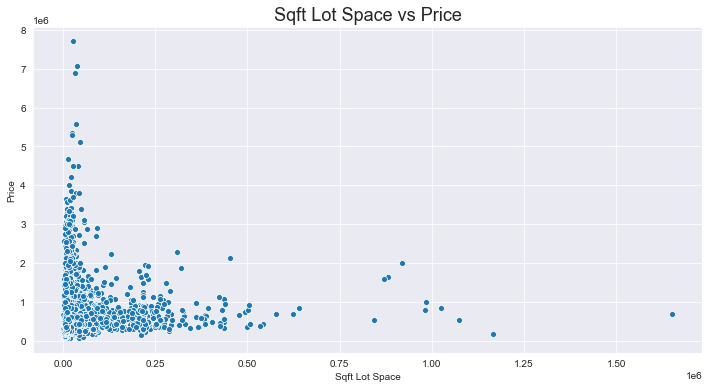

In [13]:
var = 'sqft_lot'
fig, axe = plt.subplots(figsize = (12,6))
sns.scatterplot(data = df_train, x = df_train[var], y = df_train['price'])
axe.set_title('Sqft Lot Space vs Price', fontdict = {'fontsize' : 18})
axe.set_ylabel('Price')
axe.set_xlabel('Sqft Lot Space')
plt.show()

There doesn't seem to be the same relationship for the lot size. 

Let's try this for all of them at the same time. 

In [14]:
df_train.columns.values

array(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'], dtype=object)

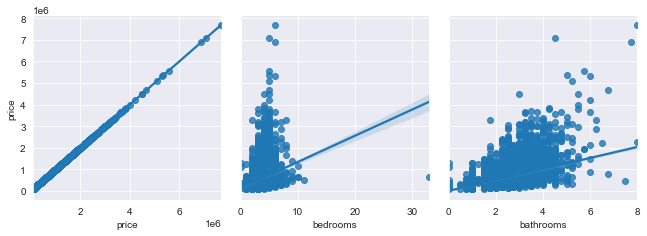

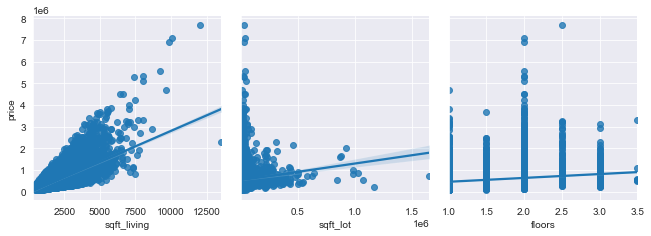

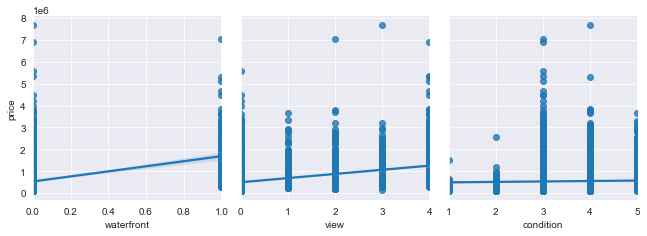

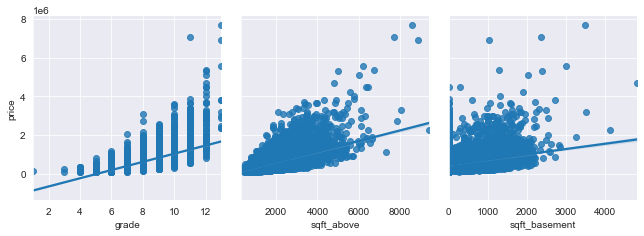

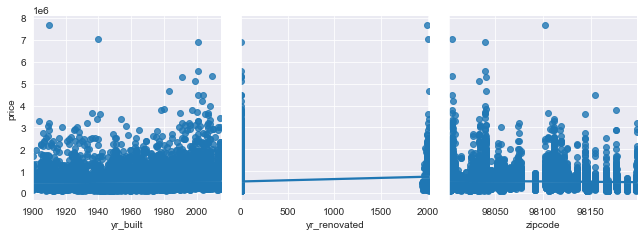

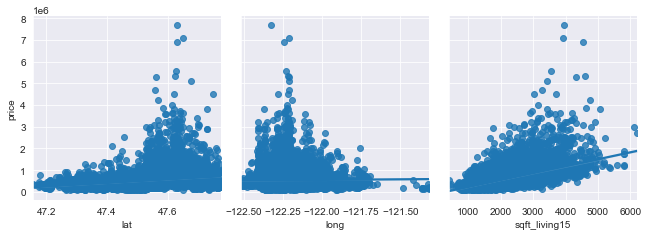

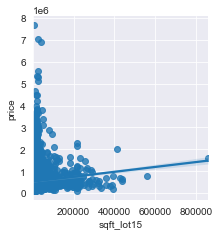

In [15]:
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

n = 3
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]

for i in row_groups:
    pp = sns.pairplot(data=df_train, y_vars=['price'],x_vars=i, kind="reg", height=3)

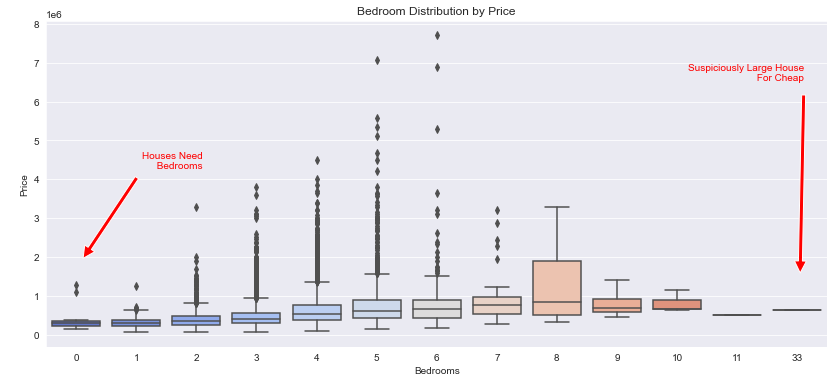

In [16]:
var = 'bedrooms'
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(x=var, y="price", data=df_train, palette='coolwarm')
ax.annotate('Suspiciously Large House\n For Cheap',color = 'r',
            xy=(800,100), xycoords='figure points',
            xytext=(.97, 0.87), textcoords='axes fraction',
            arrowprops=dict(facecolor='r', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
ax.annotate('Houses Need\n Bedrooms',color = 'r',
            xy=(80,120), xycoords='figure points',
            xytext=(.2, 0.6), textcoords='axes fraction',
            arrowprops=dict(facecolor='r', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
ax.set(xlabel='Bedrooms', ylabel='Price',title='Bedroom Distribution by Price')
plt.savefig('PNG/annotated_bedrooms_distribution.png', bbox_inches = 'tight',pad_inches = 0)

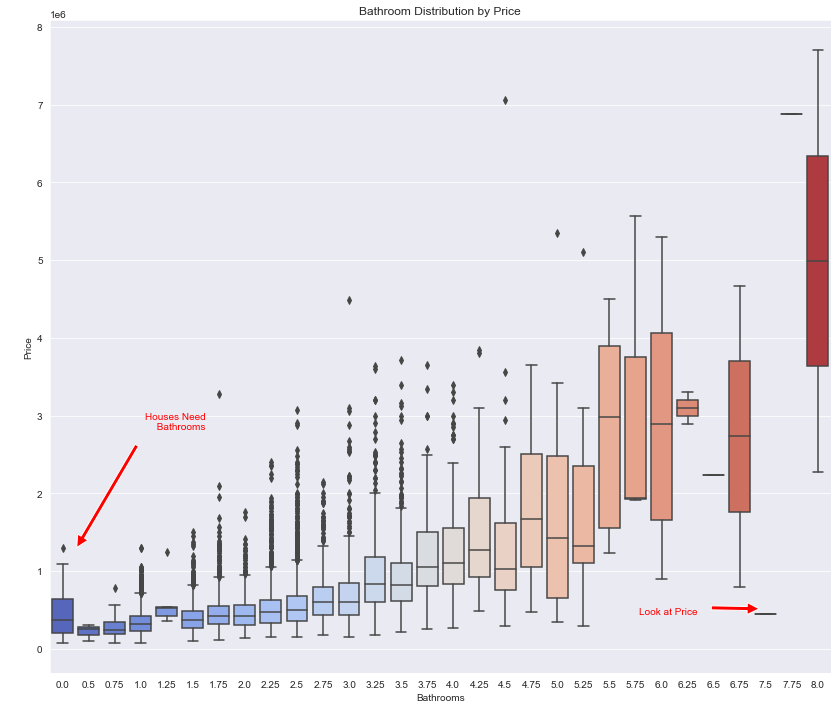

In [17]:
var = 'bathrooms'
fig, ax = plt.subplots(figsize=(14,12))
sns.boxplot(x=var, y="price", data=df_train, palette='coolwarm')
ax.annotate('Houses Need\n Bathrooms',color = 'r',
            xy=(70,150), xycoords='figure points',
            xytext=(.2, 0.4), textcoords='axes fraction',
            arrowprops=dict(facecolor='r', shrink=0.09),
            horizontalalignment='right', verticalalignment='top')
ax.annotate('Look at Price',color = 'r',
            xy=(770,100), xycoords='figure points',
            xytext=(.83, 0.1), textcoords='axes fraction',
            arrowprops=dict(facecolor='r', shrink=0.15),
            horizontalalignment='right', verticalalignment='top')
ax.set( xlabel='Bathrooms', ylabel='Price',
       title='Bathroom Distribution by Price')
plt.savefig('PNG/annotated_bathrooms_distribution.png', bbox_inches = 'tight',pad_inches = 0)

[(0.0, 5000000.0),
 Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Grade'),
 Text(0.5, 1.0, 'Grade vs Price')]

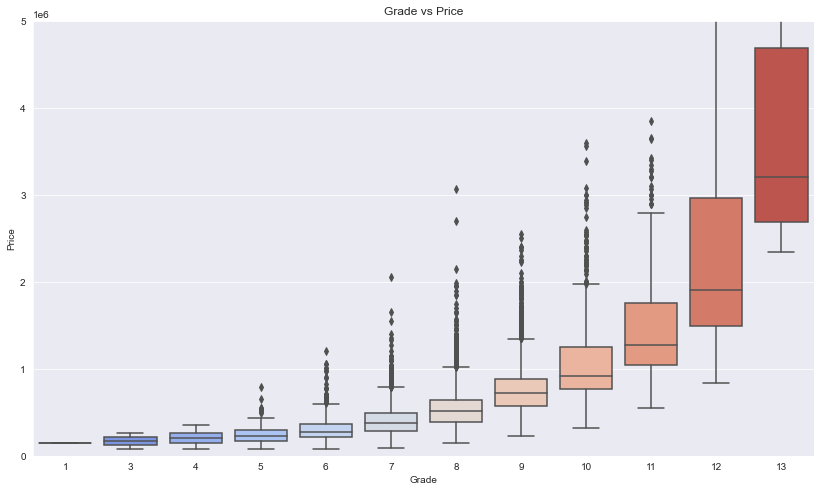

In [18]:
var = 'grade'
fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(x=var, y="price", data=df_train, palette='coolwarm')
ax.set( xlabel='Grade', ylabel='Price',ylim = [0,5000000],
       title='Grade vs Price')

'ax.annotate("Skewness: %f" % (np.log(df_train[\'price\'])).skew(),color = \'k\',\n            xy=(800,130), xycoords=\'figure points\',\n            xytext=(.97, 0.87), textcoords=\'axes fraction\',\n            horizontalalignment=\'right\', verticalalignment=\'top\')\nax.annotate("Kurtosis: %f" % (np.log(df_train[\'price\'])).kurt(),color = \'k\',\n            xy=(800,130), xycoords=\'figure points\',\n            xytext=(.97, 0.81), textcoords=\'axes fraction\',\n            horizontalalignment=\'right\', verticalalignment=\'top\')'

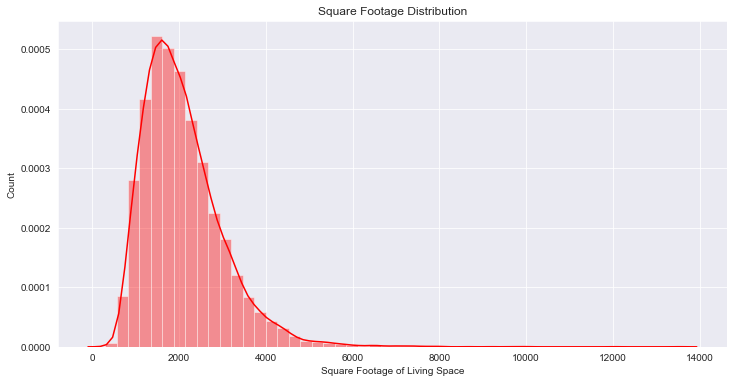

In [6]:
fig, ax = plt.subplots(figsize = (12,6))
sns.distplot(df_train['sqft_living'], bins=50, color = 'r')
ax.set( xlabel='Square Footage of Living Space', ylabel='Count',
       title='Square Footage Distribution')
"""ax.annotate("Skewness: %f" % (np.log(df_train['price'])).skew(),color = 'k',
            xy=(800,130), xycoords='figure points',
            xytext=(.97, 0.87), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top')
ax.annotate("Kurtosis: %f" % (np.log(df_train['price'])).kurt(),color = 'k',
            xy=(800,130), xycoords='figure points',
            xytext=(.97, 0.81), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top')"""
#plt.savefig('PNG/log_price_distribution.png', bbox_inches = 'tight',pad_inches = 0)

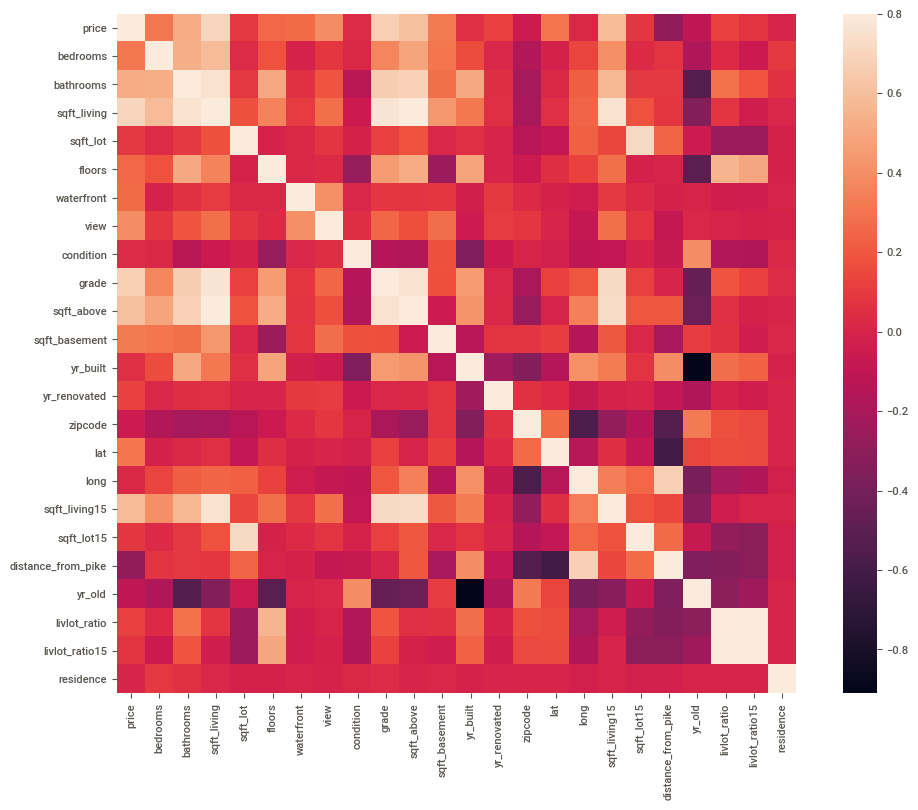

In [22]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

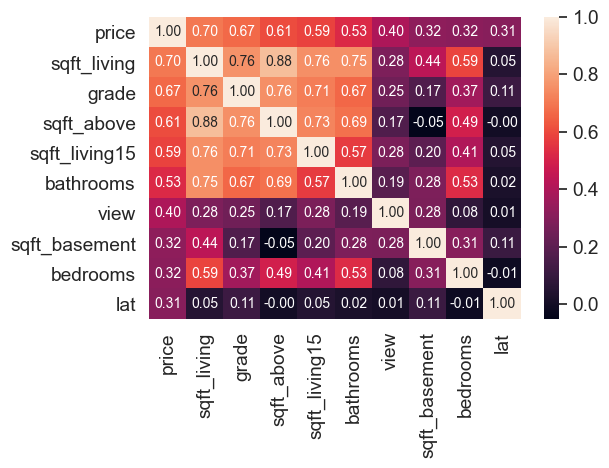

In [23]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [7]:
df_train['price'] = np.log(df_train['price'])

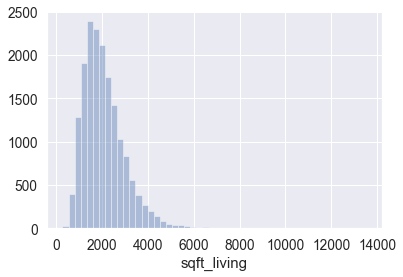

In [23]:
sns.distplot(df_train['sqft_living'], bins=50, kde=False)

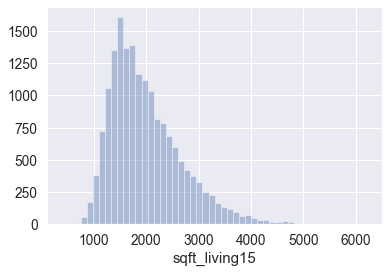

In [24]:
sns.distplot(df_train['sqft_living15'], bins=50, kde=False)

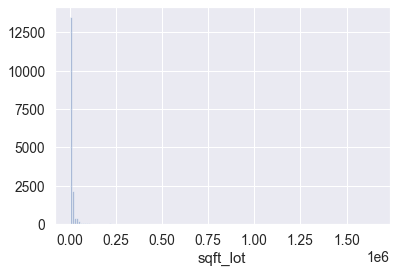

In [25]:
sns.distplot(df_train['sqft_lot'], bins=150, kde=False)

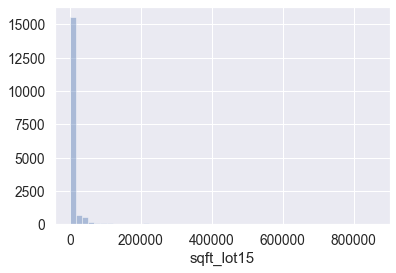

In [26]:
sns.distplot(df_train['sqft_lot15'], bins=50, kde=False)

# Data Cleaning

In [11]:
df_train.shape

(21608, 19)

In [12]:
conditions = [(df_train['bedrooms'].eq(0)) & (df_train['sqft_living'].gt(2000)) & (df_train['bathrooms'].ge(2)),
              (df_train['bedrooms'].eq(0)) & (df_train['sqft_living'].gt(3000)) & (df_train['bathrooms'].ge(2)),
              (df_train['bedrooms'].eq(0)) & (df_train['sqft_living'].gt(1200)) & (df_train['bathrooms'].ge(2)),
              (df_train['bedrooms'].gt(9)) &df_train['sqft_living'].gt(1500) & df_train['bathrooms'].ge(1.5)]

choices = [3,
           4,
           2,
           3]

df_train['bedrooms'] = np.select(conditions,choices,df_train['bedrooms'])

<ipython-input-12-1854bd3083d0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['bedrooms'] = np.select(conditions,choices,df_train['bedrooms'])


In [13]:
print('Top Lot Sizes:')
print(df_train.sqft_lot.sort_values(ascending = False).head())
print('\n')
print('Top House Sizes:')
print(df_train.sqft_living.sort_values(ascending = False).head())


Top Lot Sizes:
1719     1651359
17319    1164794
7647     1074218
7769     1024068
3949      982998
Name: sqft_lot, dtype: int64


Top House Sizes:
12777    13540
7252     12050
3914     10040
9254      9890
8092      9640
Name: sqft_living, dtype: int64


# Feature Engineering

47.609862, -122.342056 are the coordinates of Pike Place

Counting Pike Place as the proxy for city center.

In [14]:
from geopy.distance import geodesic
pike_place = (47.609862, -122.342056)
df_train['coords'] = tuple(zip(df_train['lat'],df_train['long']))
df_train['distance_from_pike'] = df_train['coords'].apply(lambda x: geodesic(pike_place,x))
df_train['distance_from_pike'] = df_train['distance_from_pike'].astype(str).str[:-3].astype(float)

<ipython-input-14-14c48e16bcfb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['coords'] = tuple(zip(df_train['lat'],df_train['long']))
<ipython-input-14-14c48e16bcfb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['distance_from_pike'] = df_train['coords'].apply(lambda x: geodesic(pike_place,x))
<ipython-input-14-14c48e16bcfb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [15]:
df_train['yr_renovated'].value_counts()

0       20695
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [16]:
df_train['yr_old'] = np.where(df_train['yr_renovated'].gt(0),2015-df_train['yr_renovated'],2015 - df_train['yr_built'])
df_train.head()

<ipython-input-16-021d6b96757d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['yr_old'] = np.where(df_train['yr_renovated'].gt(0),2015-df_train['yr_renovated'],2015 - df_train['yr_built'])


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,coords,distance_from_pike,yr_old
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,"(47.5112, -122.257)",12.700453,60
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,"(47.721000000000004, -122.319)",12.477492,24
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,"(47.7379, -122.23299999999999)",16.423308,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,"(47.5208, -122.39299999999999)",10.618247,50
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,"(47.6168, -122.045)",22.346355,28


In [17]:
df_train['livlot_ratio'] = df_train['sqft_living'] / df_train['sqft_lot']
df_train['livlot_ratio15'] = df_train['sqft_living15'] / df_train['sqft_lot15']

<ipython-input-17-58e188d7d3a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['livlot_ratio'] = df_train['sqft_living'] / df_train['sqft_lot']
<ipython-input-17-58e188d7d3a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['livlot_ratio15'] = df_train['sqft_living15'] / df_train['sqft_lot15']


In [18]:
df_train = df_train[df_train['bedrooms'].ge(0)]

<ipython-input-18-d96ec30c9432>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['residence'] = np.where((df_train['bedrooms'].gt(0)) & (df_train['bathrooms'].gt(0)),1,0)


17319    0.000610
1719     0.000787
17576    0.001499
18379    0.001799
2871     0.002123
           ...   
20994    2.130435
18010    2.187500
17434    2.291399
3452     4.055829
15743    4.653846
Name: livlot_ratio, Length: 21608, dtype: float64

In [ ]:
#df_train['residence'] = np.where((df_train['bedrooms'].gt(0)) & (df_train['bathrooms'].gt(0)),1,0)
#df_train.livlot_ratio.sort_values()

As you can see, the difference between the lot and house is substantial.
There has to be a trend, maybe these are not houses?


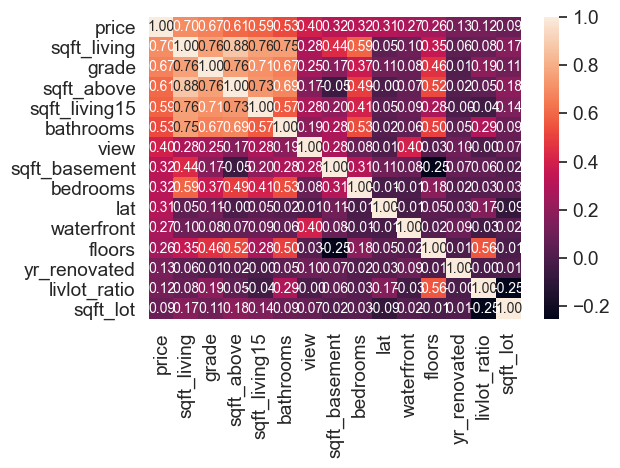

In [24]:
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


# Modeling

In [25]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [26]:
X = df_train.drop(columns=['price','coords'])
y = df_train['price']
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,distance_from_pike,yr_old,livlot_ratio,livlot_ratio15,residence
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,12.700453,60,0.208850,0.237168,1
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12.477492,24,0.354874,0.221233,1
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,16.423308,82,0.077000,0.337385,1
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,10.618247,50,0.392000,0.272000,1
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,22.346355,28,0.207921,0.239904,1


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(17286, 23)
(17286,)
(4322, 23)
(4322,)


In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

In [34]:
def get_score(prediction, lables):    
    print('R2 Score: {}'.format(r2_score(prediction, lables)))
    print('RMSE Score: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))
    
    
    
def train_test(estimator, x_train, x_test, y_train, y_test):
    prediction_train = estimator.predict(x_train)

    # Printing estimator
    print(estimator)
    # Printing train scores
    print('Train')
    get_score(prediction_train, y_train)
    prediction_test = estimator.predict(x_test)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_test)

In [37]:
from sklearn import ensemble, tree, linear_model
ENSTest = linear_model.ElasticNetCV(
    alphas=[0.0001, 0.0005, 0.001,
            0.01, 0.1, 1, 10], l1_ratio=[.01,
                                         .1, .5, .9, .99], max_iter=5000).fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 325006454216728.8, tolerance: 182487017913.37952
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296594496270548.8, tolerance: 182487017913.37952
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271286806873512.44, tolerance: 182487017913.37952
  model = cd_fast.enet_coordinate

In [38]:
train_test(ENSTest, X_train, X_test, y_train, y_test)

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
             cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
             n_jobs=None, normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)
Train
R2 Score: 0.6340660004783509
RMSE Score: 190580.2138107692
Test
R2 Score: 0.6560217447797898
RMSE Score: 187517.65878889372


In [41]:
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(X_train, y_train)

train_test(GBest, X_train, X_test, y_train, y_test)




GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='huber',
                          max_depth=3, max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
Train
R2 Score: 0.9361477300444517
RMSE Score: 87012.20862756623
Test
R2 Score: 0.8883982452137382
RMSE Score: 113935.59437651474
